<a href="https://colab.research.google.com/github/arpit7714/linearregression/blob/master/new2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # y labels are oh-encoded

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
m_train=mnist.train.num_examples
m_test=mnist.test.num_examples
m_validation=mnist.validation.num_examples
print(m_train,m_test,m_validation)

55000 10000 5000


In [0]:
#global variables
n_input=784
n_hidden1=512
n_hidden2=256
n_hidden3=128
n_hidden4=64
n_output=10

In [0]:
#hyperparameters reamins constant during the process of training
learning_rate=1e-4
epoch=1000
batch_size=32
dropout=0.5

In [0]:
#truncated_normal values are basically intialized value of the weight
#these values are close to zero and are rondom 
weights = {
    'w1':tf.Variable(tf.truncated_normal([n_input,n_hidden1],stddev=0.1)),
    'w2':tf.Variable(tf.truncated_normal([n_hidden1,n_hidden2],stddev=0.1)),
    'w3':tf.Variable(tf.truncated_normal([n_hidden2,n_hidden3],stddev=0.1)),
    'w4':tf.Variable(tf.truncated_normal([n_hidden3,n_hidden4],stddev=0.1)),
    'w5':tf.Variable(tf.truncated_normal([n_hidden4 , n_output ],stddev=0.1))
    
    
}             

In [32]:
print(weights['w1'])

<tf.Variable 'Variable_10:0' shape=(784, 512) dtype=float32_ref>


In [0]:
biases={
    'b1':tf.Variable(tf.constant(0.1,shape=[n_hidden1])),
    'b2':tf.Variable(tf.constant(0.1,shape=[n_hidden2])),
    'b3':tf.Variable(tf.constant(0.1,shape=[n_hidden3])),
    'b4':tf.Variable(tf.constant(0.1,shape=[n_hidden4])),
    'b5':tf.Variable(tf.constant(0.1,shape=[n_output]))
    
}

In [34]:
print(biases['b1'])

<tf.Variable 'Variable_15:0' shape=(512,) dtype=float32_ref>


In [0]:
X=tf.placeholder("float",[None,n_input])
Y=tf.placeholder("float",[None,n_output])

In [0]:

#neural network
layer_1=tf.add(tf.matmul(X,weights['w1']),biases['b1'])
out_1=tf.nn.relu(layer_1)
layer_2=tf.add(tf.matmul(out_1,weights['w2']),biases['b2'])
out_2=tf.nn.relu(layer_2)
layer_3=tf.add(tf.matmul(out_2,weights['w3']),biases['b3'])
out_3=tf.nn.relu(layer_3)
layer_4=tf.add(tf.matmul(out_3,weights['w4']),biases['b4'])
out_4=tf.nn.relu(layer_4)
layer_5=tf.add(tf.matmul(out_4,weights['w5']),biases['b5'])


In [0]:
#cross entropy of log-loss function to optimize the cost
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=layer_5))
train_step=tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [0]:

#correct prediction
prediction=tf.equal(tf.argmax(layer_5,1),tf.argmax(Y,1))
#accuracy how many it is telling correctly
accuracy = tf.reduce_mean(tf.cast(prediction,tf.float32))

In [0]:
init=tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

iteration 0 	 LOSS= 2.2398162 	Accuracy = 0.15625
iteration 100 	 LOSS= 1.094311 	Accuracy = 0.75
iteration 200 	 LOSS= 0.54810333 	Accuracy = 0.84375
iteration 300 	 LOSS= 0.67668605 	Accuracy = 0.8125
iteration 400 	 LOSS= 0.39334443 	Accuracy = 0.90625
iteration 500 	 LOSS= 0.36751515 	Accuracy = 0.90625
iteration 600 	 LOSS= 0.40295655 	Accuracy = 0.90625
iteration 700 	 LOSS= 0.43248063 	Accuracy = 0.875
iteration 800 	 LOSS= 0.10875702 	Accuracy = 0.96875
iteration 900 	 LOSS= 0.29683375 	Accuracy = 0.875
iteration 1000 	 LOSS= 0.08287067 	Accuracy = 0.96875
iteration 1100 	 LOSS= 0.33761126 	Accuracy = 0.84375
iteration 1200 	 LOSS= 0.1623035 	Accuracy = 0.9375
iteration 1300 	 LOSS= 0.07790148 	Accuracy = 0.9375
iteration 1400 	 LOSS= 0.14244193 	Accuracy = 0.96875
iteration 1500 	 LOSS= 0.06711878 	Accuracy = 1.0
iteration 1600 	 LOSS= 0.15670353 	Accuracy = 0.9375
iteration 1700 	 LOSS= 0.1327316 	Accuracy = 0.9375
iteration 1800 	 LOSS= 0.04212682 	Accuracy = 1.0
iteration 1

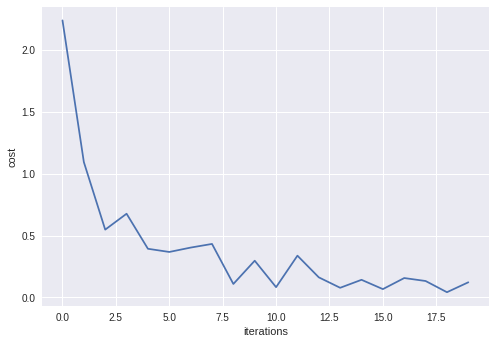

In [40]:
import matplotlib.pyplot as plt
costlist=[]
for i in range(2000):
  batch_x,batch_y=mnist.train.next_batch(batch_size)
  sess.run(train_step,feed_dict={X:batch_x,Y:batch_y})
  if i%100==0:
    minibatch_loss,minbatch_accuracy=sess.run([cost,accuracy],feed_dict={X:batch_x,Y:batch_y})
    print("iteration",str(i),"\t LOSS=",str(minibatch_loss),"\tAccuracy =",str(minbatch_accuracy))
    costlist.append(minibatch_loss)
num=[]
for j in range(20):
  num.append(j)
plt.plot(num,costlist)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

In [0]:
import numpy as np 


prediction 25


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


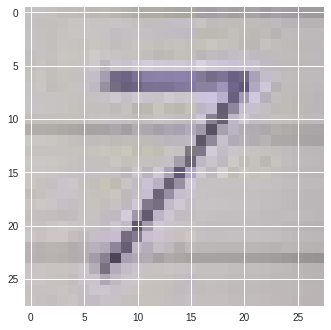

In [44]:
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
img = np.invert(Image.open("img_20181230_153400__5r8Db.jpg").convert('L')).ravel()
my_image = "img_20181230_153400__5r8Db.jpg"
fname = my_image
image = np.array(ndimage.imread(fname, flatten=False))
#my_image = scipy.misc.imresize(image, size=(28,28)).reshape((1, 64 * 64 * 3)).T
#my_image_prediction = predict(my_image, parameters)
plt.imshow(image)

#plt.show(img)
prediction1 = sess.run(tf.argmax(layer_4,1), feed_dict={X: [img]})
print("prediction",np.squeeze(prediction1))